# Nuclear Weapons

  0%|          | 0/874 [00:00<?, ? frames/s]


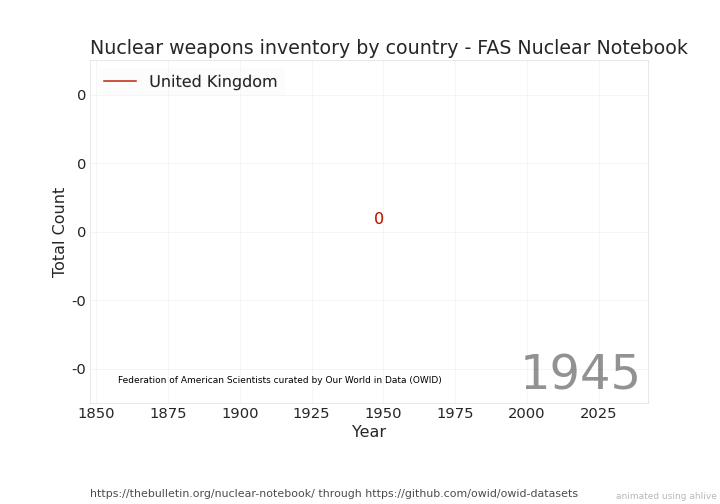

In [1]:
import pandas as pd
import ahlive as ah

# load data
df, meta = ah.tutorial.open_dataset(
    "owid_nuclear_weapons_inventory_by_country_fas_nuclear_notebook",
    return_meta=True
)

# rename columns
df.columns = ["entity", "year", "count"]

# sort by maximum count
countries = df.groupby("entity")["count"].max().sort_values().index
df["entity"] = pd.Categorical(
    df["entity"],
    categories=countries,
    ordered=True
)
df = df.sort_values(["entity", "year"])

# subset only the top four
df = df.loc[df["entity"].isin(countries[-4:])]

# serialize data
ah_df = ah.DataFrame(
    # map data columns onto axes
    df,
    xs="year",
    ys="count",
    label="entity",

    # let one label finish before another starts
    join="cascade",

    # add more interpolated frames
    frames=3,
    
    # enlarge the figure size
    figsize=(10, 7),

    # map the axes' limits
    xlims="explore",
    ylims="explore",

    # map data columns onto dynamic labels
    state_labels="year",
    inline_labels="count",

    # add static labels
    title=meta["label"],
    xlabel="Year",
    ylabel="Total Count",

    # add citations
    note=meta["source"],
    caption=meta["base_url"],

    # add margins
    xmargins=(0.05, 0.2),
    ymargins=(0.12, 0.2),

    # parallelize generation of each frame
    scheduler="processes",
    workers=4
)

# pause animation to add remarks
remark_kwds = dict(
    labels=["United States", "Russia"],
    durations=3,
    persist_plot=True
)
ah_df = ah_df.remark("Cold War begins", xs=1947, **remark_kwds)
ah_df = ah_df.remark(
    "Peak number of weapons by the US",
    ys=df.loc[df["entity"] == "United States", "count"].max(),
    **remark_kwds
)
ah_df = ah_df.remark(
    "Peak number of weapons by Russia",
    ys=df["count"].max(),
    **remark_kwds)

ah_df = ah_df.remark(
    "Cold War ends",
    xs=1991,
    **remark_kwds
)

# slow down animation and make horizontal alignment on left side
ah_df = ah_df.config(
    "durations",
    final_frame=5
).config(
    "remark_inline",
    ha="left"
)

# create animation
ah_df.render()